# Constructing hurricane risk scores

The plan here to to first of all look at the exposure of each county in Florida to hurricanes - particularly hurricanes of higher categories.
Following one from this, we will look at the presence of each company in each of the counties as therefore the risk to each company relating to hurricanes.

## Preamble

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set up data directories
data_path = '../data/{0}.csv'

In [3]:
def dfSummary(df):
    print('Data Types:\n{0}\n'.format(df.dtypes))
    print('Dimensions:\n{0}\n'.format(df.shape))
    print('Columns:\n{0}\n'.format(df.columns.values))
    print('Data Head:\n{0}\n'.format(df.head()))

## Hurricanes in each county

Read in hurricane data

In [4]:
hurricane_data = pd.read_csv(data_path.format('hurricane'))

In [5]:
dfSummary(hurricane_data)

Data Types:
County                object
MajorHurricaneHits     int64
dtype: object

Dimensions:
(45, 2)

Columns:
['County' 'MajorHurricaneHits']

Data Head:
     County  MajorHurricaneHits
0     Baker                   1
1       Bay                   4
2  Bradford                   1
3   Brevard                   2
4   Broward                   1



In [16]:
print(hurricane_data['MajorHurricaneHits'].unique())

[1 4 2 3 8 6]


In [22]:
hurricane_data['County'] = hurricane_data['County'].str.lower()

## Companies in each county

Read in companies data

In [23]:
companies_data = pd.read_csv(data_path.format('final_companies'))
companies_data['County'] = companies_data['County'].str.lower()
dfSummary(companies_data)

Data Types:
Unnamed: 0                           int64
Filing ID                            int64
Company ID                           int64
Company                             object
County                              object
Insurance Type                      object
Insurance Type Code                  int64
Number of Claims                   float64
Closed Claims (paid)               float64
Closed Claims (not paid)           float64
Number Claims Open                 float64
Paid Loss                          float64
Number Claims with AOB             float64
NAIC Number                          int64
Claims                             float64
Proportion of Claims               float64
Company Name                        object
NAIC Code                          float64
Product type                        object
Share of product complaints (%)    float64
Product premium                    float64
Share of product premiums (%)      float64
Number of complaints               float64

In [24]:
print(len(companies_data['County'].unique()))

68


Join hurricane data to company claims data.

In [25]:
# Need to define the direction of the join, and the join keys
df = pd.merge(left=companies_data, right=hurricane_data, on='County', how='left')

In [26]:
print(df['MajorHurricaneHits'].unique())

[ 3.  1. nan  2.  4.  8.]


We want to map these nan's to 0.

In [30]:
def nan_to_nought(row):
    if pd.isna(row['MajorHurricaneHits']):
        return 0
    else:
        return row['MajorHurricaneHits']

In [31]:
df['Number of hurricanes'] = df.apply(nan_to_nought,axis=1)
dfSummary(df)

Data Types:
Unnamed: 0                           int64
Filing ID                            int64
Company ID                           int64
Company                             object
County                              object
Insurance Type                      object
Insurance Type Code                  int64
Number of Claims                   float64
Closed Claims (paid)               float64
Closed Claims (not paid)           float64
Number Claims Open                 float64
Paid Loss                          float64
Number Claims with AOB             float64
NAIC Number                          int64
Claims                             float64
Proportion of Claims               float64
Company Name                        object
NAIC Code                          float64
Product type                        object
Share of product complaints (%)    float64
Product premium                    float64
Share of product premiums (%)      float64
Number of complaints               float64

In [32]:
print(df['Number of hurricanes'].unique())

[3. 1. 0. 2. 4. 8.]


Create new column of claims per hurricane for each company in each county.

In [38]:
def make_claims_per_hurricane(row):
    x = row['Number of Claims']
    y = row['Number of hurricanes']
    if x==0:
        return 0
    elif y==0:
        return np.NaN
    else:
        return x/y

In [39]:
df['claims_per_hurricane'] = df.apply(make_claims_per_hurricane, axis=1)

In [40]:
dfSummary(df)

Data Types:
Unnamed: 0                           int64
Filing ID                            int64
Company ID                           int64
Company                             object
County                              object
Insurance Type                      object
Insurance Type Code                  int64
Number of Claims                   float64
Closed Claims (paid)               float64
Closed Claims (not paid)           float64
Number Claims Open                 float64
Paid Loss                          float64
Number Claims with AOB             float64
NAIC Number                          int64
Claims                             float64
Proportion of Claims               float64
Company Name                        object
NAIC Code                          float64
Product type                        object
Share of product complaints (%)    float64
Product premium                    float64
Share of product premiums (%)      float64
Number of complaints               float64

715


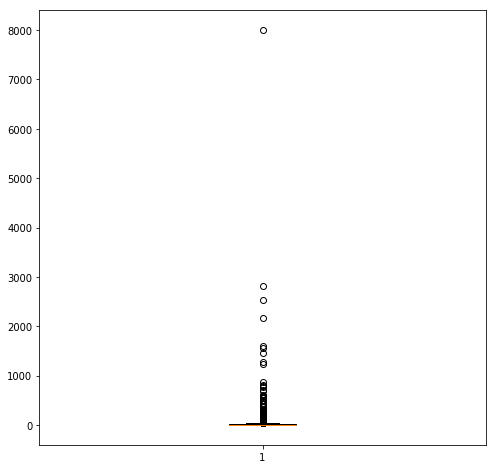

In [42]:
print(df['claims_per_hurricane'].isna().sum())
plt.figure(figsize=(8,8))
plt.boxplot(df['claims_per_hurricane'].dropna())
plt.show()

Hopefully all done and easy.
Perhaps we could consider turning these into z-scores?
If we do this then we may want to think about what we do with these ridiculous outlliers? (are they outliers?)

Write out our new data set.

In [44]:
df.to_csv(data_path.format('final_hurricane_companies'))

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(data_path.format('final_hurricane_companies'))

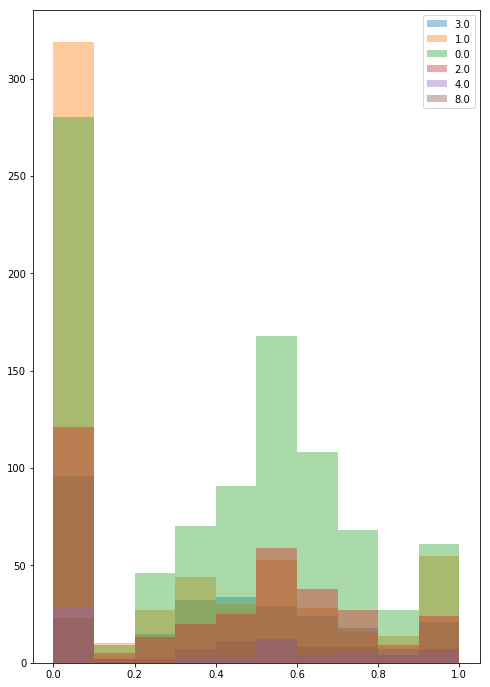

In [6]:
plt.figure(figsize=(8,12))
for x in df['Number of hurricanes'].unique():
    tdf = df.loc[df['Number of hurricanes']==x]
    plt.hist(tdf['Frequency'], label=x, alpha=0.4)
plt.legend()
plt.show()

In [11]:
import numpy as np
import math

In [12]:
math.corr(df['Frequency'], df['Number of hurricanes'])

AttributeError: module 'math' has no attribute 'corr'